In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.master("local").appName("lab_spark").getOrCreate()

In [3]:
spark.version

'3.1.1'

# Задание 1: Для RDD и Dataframes

## Добавление названий колонкам 

In [4]:
import pandas as pd

df_pd = pd.read_csv("data.csv",header=None)
df_pd.columns = ['target','id','date','flag','user','text']

df_pd.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df_pd.to_csv('data_with_columns.csv',index=False)

## Прочитать датасет и вывести первые 20 записей 

### Для RDD 

In [6]:
df_rdd = (spark.sparkContext.textFile("data_with_columns.csv")
          .map(lambda line: line.split(","))
          .map(lambda line: line[:5] + [','.join(line[5:])])
          
         )

header = df_rdd.first()
df_rdd_data = df_rdd.filter(lambda line: line != header)

In [8]:
df_rdd_data.take(20)

[['0',
  '1467810369',
  'Mon Apr 06 22:19:45 PDT 2009',
  'NO_QUERY',
  '_TheSpecialOne_',
  '"@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"'],
 ['0',
  '1467810672',
  'Mon Apr 06 22:19:49 PDT 2009',
  'NO_QUERY',
  'scotthamilton',
  "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"],
 ['0',
  '1467810917',
  'Mon Apr 06 22:19:53 PDT 2009',
  'NO_QUERY',
  'mattycus',
  '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'],
 ['0',
  '1467811184',
  'Mon Apr 06 22:19:57 PDT 2009',
  'NO_QUERY',
  'ElleCTF',
  'my whole body feels itchy and like its on fire '],
 ['0',
  '1467811193',
  'Mon Apr 06 22:19:57 PDT 2009',
  'NO_QUERY',
  'Karoli',
  '"@nationwideclass no, it\'s not behaving at all. i\'m mad. why am i here? because I can\'t see you all over there. "'],
 ['0',
  '1467811372',
  'Mon Apr 06 22:20:00 PDT 

In [9]:
from pyspark.sql import Row

df_rdd_data_rows = df_rdd_data.map(lambda line: Row(target=int(line[0]), 
                                                    id=int(line[1]),
                                                    date=line[2],
                                                    flag=line[3],
                                                    user=line[4],
                                                    text=line[5]
                                                   )
                                  )
df_rdd_data_rows.take(20)

[Row(target=0, id=1467810369, date='Mon Apr 06 22:19:45 PDT 2009', flag='NO_QUERY', user='_TheSpecialOne_', text='"@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"'),
 Row(target=0, id=1467810672, date='Mon Apr 06 22:19:49 PDT 2009', flag='NO_QUERY', user='scotthamilton', text="is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"),
 Row(target=0, id=1467810917, date='Mon Apr 06 22:19:53 PDT 2009', flag='NO_QUERY', user='mattycus', text='@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'),
 Row(target=0, id=1467811184, date='Mon Apr 06 22:19:57 PDT 2009', flag='NO_QUERY', user='ElleCTF', text='my whole body feels itchy and like its on fire '),
 Row(target=0, id=1467811193, date='Mon Apr 06 22:19:57 PDT 2009', flag='NO_QUERY', user='Karoli', text='"@nationwideclass no, it\'s not behaving at all. i\'m mad. why am i here? b

### Для Dataframe 

In [10]:
df = spark.read.option("header",True).csv("data_with_columns.csv")
df.printSchema()

root
 |-- target: string (nullable = true)
 |-- id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)



In [11]:
df.show()

+------+----------+--------------------+--------+---------------+--------------------+
|target|        id|                date|    flag|           user|                text|
+------+----------+--------------------+--------+---------------+--------------------+
|     0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|     0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|     0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|     0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|     0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|     0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|     0|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|     0|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|     0|1467811795|Mon Apr 06 22:20:...|NO_

## Посчитать количество слов во всех твитах датасета 

### Для RDD

In [22]:
# количество слов в каждом твите

(
    df_rdd_data_rows
    .map(lambda row: (row.id,len(row.text.split())))
    .take(20)
)

[(1467810369, 19),
 (1467810672, 21),
 (1467810917, 18),
 (1467811184, 10),
 (1467811193, 22),
 (1467811372, 5),
 (1467811592, 3),
 (1467811594, 22),
 (1467811795, 6),
 (1467812025, 5),
 (1467812416, 7),
 (1467812579, 5),
 (1467812723, 20),
 (1467812771, 16),
 (1467812784, 20),
 (1467812799, 19),
 (1467812964, 18),
 (1467813137, 4),
 (1467813579, 11),
 (1467813782, 12)]

In [59]:
# всего слов во всех твитах
(
    df_rdd_data_rows
    .flatMap(lambda row: row.text.lower().split())
    .map(lambda word: (word,1))
    .reduceByKey(lambda a, b: a + b)
    .values()
    .sum()
)

21347893

In [62]:
# количество слов во всех твитах

(
    df_rdd_data_rows
    .map(lambda row: (row.id,len((row.text.split()))))
    .values()
    .sum()
)

21347893

### Для Dataframe 

In [13]:
import pyspark.sql.functions as F

In [19]:
# количество слов в каждом твите
(
    df.withColumn('text',F.lower(F.col('text')))
    .withColumn('list_text', F.array_remove(F.split(F.col('text'),' '), ''))
    .withColumn('number_of_words', F.size(F.col('list_text')))
    .select('id','number_of_words').show()
)

+----------+---------------+
|        id|number_of_words|
+----------+---------------+
|1467810369|             19|
|1467810672|             21|
|1467810917|             18|
|1467811184|             10|
|1467811193|             21|
|1467811372|              5|
|1467811592|              3|
|1467811594|             22|
|1467811795|              6|
|1467812025|              5|
|1467812416|              7|
|1467812579|              5|
|1467812723|             20|
|1467812771|             15|
|1467812784|             20|
|1467812799|             19|
|1467812964|             18|
|1467813137|              4|
|1467813579|             11|
|1467813782|             12|
+----------+---------------+
only showing top 20 rows



In [63]:
# всего слов во всех твитах

(
    df.withColumn('text',F.lower(F.col('text')))
    .withColumn('list_text', F.array_remove(F.split(F.col('text'),' '), ''))
    .withColumn('word',F.explode(F.col('list_text')))
    .select('word')
    .count()
)

23011409

## Посчитать количество уникальных слов во всех твитах 

### Для RDD 

In [21]:
# количество уникальных слов в каждом твите

(
    df_rdd_data_rows
    .map(lambda row: (row.id,len(set(row.text.split()))))
    .take(20)
)

[(1467810369, 19),
 (1467810672, 21),
 (1467810917, 18),
 (1467811184, 10),
 (1467811193, 22),
 (1467811372, 5),
 (1467811592, 3),
 (1467811594, 19),
 (1467811795, 6),
 (1467812025, 5),
 (1467812416, 7),
 (1467812579, 5),
 (1467812723, 15),
 (1467812771, 16),
 (1467812784, 18),
 (1467812799, 17),
 (1467812964, 18),
 (1467813137, 4),
 (1467813579, 11),
 (1467813782, 12)]

In [47]:
# всего уникальных слов во всех твитах

(
    df_rdd_data_rows
    .flatMap(lambda row: row.text.lower().split())
    .map(lambda word: (word,1))
    .reduceByKey(lambda a, b: a + b)
    .keys()
    .count()
)

1288669

### Для Dataframe 

In [32]:
# количество уникальных слов в каждом твите
from pyspark.sql.types import ArrayType,StringType

def arr_to_set(arr):
    return list(set(arr))

arr_to_set_udf = F.udf(arr_to_set, ArrayType(StringType()))

(
    df.withColumn('text',F.lower(F.col('text')))
    .withColumn('list_text', F.array_remove(F.split(F.col('text'),' '), ''))
    .withColumn('number_of_words', F.size(F.col('list_text')))
    .withColumn("set_text", arr_to_set_udf(F.col("list_text")))
    .withColumn("unic_number_of_words",F.size(F.col("set_text")))
    .select('id','number_of_words','unic_number_of_words')
    .show()
)

+----------+---------------+--------------------+
|        id|number_of_words|unic_number_of_words|
+----------+---------------+--------------------+
|1467810369|             19|                  19|
|1467810672|             21|                  21|
|1467810917|             18|                  17|
|1467811184|             10|                  10|
|1467811193|             21|                  20|
|1467811372|              5|                   5|
|1467811592|              3|                   3|
|1467811594|             22|                  19|
|1467811795|              6|                   6|
|1467812025|              5|                   5|
|1467812416|              7|                   7|
|1467812579|              5|                   5|
|1467812723|             20|                  15|
|1467812771|             15|                  14|
|1467812784|             20|                  18|
|1467812799|             19|                  17|
|1467812964|             18|                  18|


In [33]:
# всего уникальных слов во всех твитах
(
    df.withColumn('text',F.lower(F.col('text')))
    .withColumn('list_text', F.array_remove(F.split(F.col('text'),' '), ''))
    .withColumn('word',F.explode(F.col('list_text')))
    .select('word')
    .dropDuplicates()
    .count()
)

1193360

# Задание 2 (для Dataframe) 

## Найти пользователей с наибольшим числом постов и вывести первые 20 из них

In [10]:
(
    df.groupby('user')
    .agg(F.countDistinct('id').alias('post_cnt'))
    .sort(F.col('post_cnt').desc())
    .show()
)

+---------------+--------+
|           user|post_cnt|
+---------------+--------+
|       lost_dog|     549|
|        webwoke|     345|
|       tweetpet|     310|
|SallytheShizzle|     281|
|    VioletsCRUK|     279|
|    mcraddictal|     276|
|       tsarnick|     248|
|    what_bugs_u|     246|
|    Karen230683|     238|
|      DarkPiano|     236|
|   SongoftheOss|     227|
|      Jayme1988|     225|
|         keza34|     219|
| ramdomthoughts|     216|
|      shanajaca|     213|
|         wowlew|     212|
|   TraceyHewins|     211|
|     nuttychris|     211|
|   thisgoeshere|     207|
|     Spidersamm|     205|
+---------------+--------+
only showing top 20 rows



## Найти пользователей с наибольшим числом слов

In [11]:
(
    df.withColumn('text',F.lower(F.col('text')))
    .withColumn('list_text', F.split(F.col('text'),' '))
    .withColumn('number_of_words', F.size(F.col('list_text')))
    .groupby('user')
    .agg(F.sum(F.col('number_of_words')).alias('word_cnt'))
    .sort(F.col('word_cnt').desc())
    .show()
)

+---------------+--------+
|           user|word_cnt|
+---------------+--------+
|       lost_dog|    6588|
|    what_bugs_u|    5177|
|    VioletsCRUK|    5108|
|SallytheShizzle|    4480|
|      shanajaca|    3698|
| felicityfuller|    3626|
|   SongoftheOss|    3436|
|          StDAY|    3341|
|     nuttychris|    3309|
| ramdomthoughts|    3229|
|       tsarnick|    3170|
|    mcraddictal|    3145|
|     Spidersamm|    3028|
|   JessMcFlyxxx|    2989|
|   thisgoeshere|    2977|
|    linnetwoods|    2928|
|    Dutchrudder|    2897|
|MTVnHollyWEST23|    2821|
| JBnVFCLover786|    2785|
|torilovesbradie|    2748|
+---------------+--------+
only showing top 20 rows



## Найти пользователей с наибольшим количеством упоминаний

In [14]:
(
    df.withColumn('text',F.lower(F.col('text')))
    .withColumn('list_text', F.split(F.col('text'),' '))
    .withColumn('word',F.explode(F.col('list_text')))
    .filter(
        (F.col('word').like('@%')) &
        (F.length(F.col('word')) > 1)
    )
    .groupby('word')
    .agg(F.countDistinct('id').alias('post_cnt'))
    .sort(F.col('post_cnt').desc())
    .show()
)

+----------------+--------+
|            word|post_cnt|
+----------------+--------+
|     @mileycyrus|    4359|
|       @tommcfly|    3833|
|       @ddlovato|    3337|
|  @jonasbrothers|    2318|
| @donniewahlberg|    1301|
|    @davidarchie|    1299|
|@jonathanrknight|    1231|
|   @jordanknight|    1121|
|   @mitchelmusso|    1053|
|  @taylorswift13|     985|
|    @dougiemcfly|     784|
|    @selenagomez|     782|
|     @dannymcfly|     674|
|         @aplusk|     606|
| @peterfacinelli|     604|
|   @joeymcintyre|     594|
|         @youngq|     553|
|    @gfalcone601|     537|
|   @shaundiviney|     504|
|    @perezhilton|     470|
+----------------+--------+
only showing top 20 rows



## Посчитать наиболее популярные для твитов дни и вывести их в порядке убывания 

In [16]:
(
    df.withColumn('week_day',F.split(F.col('date'),' ').getItem(0))
    .groupby('week_day')
    .agg(F.countDistinct('id').alias('post_cnt'))
    .sort(F.col('post_cnt').desc())
    .show()
)

+--------+--------+
|week_day|post_cnt|
+--------+--------+
|     Sun|  344097|
|     Sat|  330601|
|     Mon|  309823|
|     Fri|  225405|
|     Tue|  185667|
|     Thu|  105977|
|     Wed|   96745|
+--------+--------+



## Посчитать наиболее популярный часы для твитов

In [23]:
(
    df.withColumn('time',F.split(F.col('date'),' ').getItem(3))
    .withColumn('hour',F.hour(F.to_timestamp(F.col('time'),'HH:mm:ss')))
    .groupby('hour')
    .agg(F.countDistinct('id').alias('post_cnt'))
    .sort(F.col('post_cnt').desc())
    .show()
)

+----+--------+
|hour|post_cnt|
+----+--------+
|  23|   84652|
|   7|   83577|
|   0|   80760|
|   6|   80758|
|   5|   78512|
|  22|   78263|
|   4|   76883|
|   8|   76217|
|   1|   75157|
|   3|   74136|
|   2|   73857|
|  21|   68908|
|   9|   67212|
|  11|   60947|
|  10|   60630|
|  19|   57693|
|  20|   57016|
|  16|   55674|
|  18|   53443|
|  17|   51804|
+----+--------+
only showing top 20 rows



# Задание 3: выполнить примеры

## Basic Statistics 

### Correlation 

In [24]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

data = [(Vectors.sparse(4, [(0, 1.0), (3, -2.0)]),),
        (Vectors.dense([4.0, 5.0, 0.0, 3.0]),),
        (Vectors.dense([6.0, 7.0, 0.0, 8.0]),),
        (Vectors.sparse(4, [(0, 9.0), (3, 1.0)]),)]
df = spark.createDataFrame(data, ["features"])

r1 = Correlation.corr(df, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))

r2 = Correlation.corr(df, "features", "spearman").head()
print("Spearman correlation matrix:\n" + str(r2[0]))

Pearson correlation matrix:
DenseMatrix([[1.        , 0.05564149,        nan, 0.40047142],
             [0.05564149, 1.        ,        nan, 0.91359586],
             [       nan,        nan, 1.        ,        nan],
             [0.40047142, 0.91359586,        nan, 1.        ]])
Spearman correlation matrix:
DenseMatrix([[1.        , 0.10540926,        nan, 0.4       ],
             [0.10540926, 1.        ,        nan, 0.9486833 ],
             [       nan,        nan, 1.        ,        nan],
             [0.4       , 0.9486833 ,        nan, 1.        ]])


### ChiSquareTest 

In [25]:
from pyspark.ml.stat import ChiSquareTest

data = [(0.0, Vectors.dense(0.5, 10.0)),
        (0.0, Vectors.dense(1.5, 20.0)),
        (1.0, Vectors.dense(1.5, 30.0)),
        (0.0, Vectors.dense(3.5, 30.0)),
        (0.0, Vectors.dense(3.5, 40.0)),
        (1.0, Vectors.dense(3.5, 40.0))]
df = spark.createDataFrame(data, ["label", "features"])

r = ChiSquareTest.test(df, "features", "label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

pValues: [0.6872892787909721,0.6822703303362126]
degreesOfFreedom: [2, 3]
statistics: [0.75,1.5]


### Summarizer 

In [26]:
from pyspark.ml.stat import Summarizer
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

df = spark.sparkContext.parallelize([Row(weight=1.0, features=Vectors.dense(1.0, 1.0, 1.0)),
                     Row(weight=0.0, features=Vectors.dense(1.0, 2.0, 3.0))]).toDF()

# create summarizer for multiple metrics "mean" and "count"
summarizer = Summarizer.metrics("mean", "count")

# compute statistics for multiple metrics with weight
df.select(summarizer.summary(df.features, df.weight)).show(truncate=False)

# compute statistics for multiple metrics without weight
df.select(summarizer.summary(df.features)).show(truncate=False)

# compute statistics for single metric "mean" with weight
df.select(Summarizer.mean(df.features, df.weight)).show(truncate=False)

# compute statistics for single metric "mean" without weight
df.select(Summarizer.mean(df.features)).show(truncate=False)

+-----------------------------------+
|aggregate_metrics(features, weight)|
+-----------------------------------+
|{[1.0,1.0,1.0], 1}                 |
+-----------------------------------+

+--------------------------------+
|aggregate_metrics(features, 1.0)|
+--------------------------------+
|{[1.0,1.5,2.0], 2}              |
+--------------------------------+

+--------------+
|mean(features)|
+--------------+
|[1.0,1.0,1.0] |
+--------------+

+--------------+
|mean(features)|
+--------------+
|[1.0,1.5,2.0] |
+--------------+



## ML Pipelines 

## Example: Estimator, Transformer, and Param 

In [27]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression

# Prepare training data from a list of (label, features) tuples.
training = spark.createDataFrame([
    (1.0, Vectors.dense([0.0, 1.1, 0.1])),
    (0.0, Vectors.dense([2.0, 1.0, -1.0])),
    (0.0, Vectors.dense([2.0, 1.3, 1.0])),
    (1.0, Vectors.dense([0.0, 1.2, -0.5]))], ["label", "features"])

# Create a LogisticRegression instance. This instance is an Estimator.
lr = LogisticRegression(maxIter=10, regParam=0.01)
# Print out the parameters, documentation, and any default values.
print("LogisticRegression parameters:\n" + lr.explainParams() + "\n")

# Learn a LogisticRegression model. This uses the parameters stored in lr.
model1 = lr.fit(training)

# Since model1 is a Model (i.e., a transformer produced by an Estimator),
# we can view the parameters it used during fit().
# This prints the parameter (name: value) pairs, where names are unique IDs for this
# LogisticRegression instance.
print("Model 1 was fit using parameters: ")
print(model1.extractParamMap())

# We may alternatively specify parameters using a Python dictionary as a paramMap
paramMap = {lr.maxIter: 20}
paramMap[lr.maxIter] = 30  # Specify 1 Param, overwriting the original maxIter.
# Specify multiple Params.
paramMap.update({lr.regParam: 0.1, lr.threshold: 0.55})  # type: ignore

# You can combine paramMaps, which are python dictionaries.
# Change output column name
paramMap2 = {lr.probabilityCol: "myProbability"}  # type: ignore
paramMapCombined = paramMap.copy()
paramMapCombined.update(paramMap2)  # type: ignore

# Now learn a new model using the paramMapCombined parameters.
# paramMapCombined overrides all parameters set earlier via lr.set* methods.
model2 = lr.fit(training, paramMapCombined)
print("Model 2 was fit using parameters: ")
print(model2.extractParamMap())

# Prepare test data
test = spark.createDataFrame([
    (1.0, Vectors.dense([-1.0, 1.5, 1.3])),
    (0.0, Vectors.dense([3.0, 2.0, -0.1])),
    (1.0, Vectors.dense([0.0, 2.2, -1.5]))], ["label", "features"])

# Make predictions on test data using the Transformer.transform() method.
# LogisticRegression.transform will only use the 'features' column.
# Note that model2.transform() outputs a "myProbability" column instead of the usual
# 'probability' column since we renamed the lr.probabilityCol parameter previously.
prediction = model2.transform(test)
result = prediction.select("features", "label", "myProbability", "prediction") \
    .collect()

for row in result:
    print("features=%s, label=%s -> prob=%s, prediction=%s"
          % (row.features, row.label, row.myProbability, row.prediction))

LogisticRegression parameters:
aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bou

features=[-1.0,1.5,1.3], label=1.0 -> prob=[0.05707304171034022,0.9429269582896598], prediction=1.0
features=[3.0,2.0,-0.1], label=0.0 -> prob=[0.9238522311704105,0.07614776882958951], prediction=0.0
features=[0.0,2.2,-1.5], label=1.0 -> prob=[0.10972776114779466,0.8902722388522053], prediction=1.0


### Example: Pipeline

In [28]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer

# Prepare training documents from a list of (id, text, label) tuples.
training = spark.createDataFrame([
    (0, "a b c d e spark", 1.0),
    (1, "b d", 0.0),
    (2, "spark f g h", 1.0),
    (3, "hadoop mapreduce", 0.0)
], ["id", "text", "label"])

# Configure an ML pipeline, which consists of three stages: tokenizer, hashingTF, and lr.
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10, regParam=0.001)
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

# Fit the pipeline to training documents.
model = pipeline.fit(training)

# Prepare test documents, which are unlabeled (id, text) tuples.
test = spark.createDataFrame([
    (4, "spark i j k"),
    (5, "l m n"),
    (6, "spark hadoop spark"),
    (7, "apache hadoop")
], ["id", "text"])

# Make predictions on test documents and print columns of interest.
prediction = model.transform(test)
selected = prediction.select("id", "text", "probability", "prediction")
for row in selected.collect():
    rid, text, prob, prediction = row  # type: ignore
    print(
        "(%d, %s) --> prob=%s, prediction=%f" % (
            rid, text, str(prob), prediction   # type: ignore
        )
    )

(4, spark i j k) --> prob=[0.1596407738787412,0.8403592261212588], prediction=1.000000
(5, l m n) --> prob=[0.8378325685476614,0.16216743145233858], prediction=0.000000
(6, spark hadoop spark) --> prob=[0.06926633132976266,0.9307336686702373], prediction=1.000000
(7, apache hadoop) --> prob=[0.9821575333444208,0.017842466655579203], prediction=0.000000


# Задание 4: Построить модель предсказаний

In [46]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql import Row
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *

In [29]:
df = spark.read.option("header",True).csv("Food_Inspections.csv")
df.printSchema()

root
 |-- Inspection ID: string (nullable = true)
 |-- DBA Name: string (nullable = true)
 |-- AKA Name: string (nullable = true)
 |-- License #: string (nullable = true)
 |-- Facility Type: string (nullable = true)
 |-- Risk: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zip: string (nullable = true)
 |-- Inspection Date: string (nullable = true)
 |-- Inspection Type: string (nullable = true)
 |-- Results: string (nullable = true)
 |-- Violations: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [53]:
data = (df.select('Inspection ID','DBA Name','Results','Violations')
        .filter(F.col('Violations').isNotNull())
       )
data.show()

+-------------+--------------------+------------------+--------------------+
|Inspection ID|            DBA Name|           Results|          Violations|
+-------------+--------------------+------------------+--------------------+
|      2365699|NEW HONG KONG BUF...|              Fail|16. FOOD-CONTACT ...|
|      2365515|DOLO GARDEN RESTA...|              Fail|3. MANAGEMENT, FO...|
|      2362869|          PALM COURT|              Pass|55. PHYSICAL FACI...|
|      2362745|    KIPP ONE ACADEMY|              Pass|33. PROPER COOLIN...|
|      2362615|           MCDONALDS|              Pass|55. PHYSICAL FACI...|
|      2362603|MOY LEE CHINESE R...|              Fail|36. THERMOMETERS ...|
|      2362293| TROQUET RIVER NORTH|              Pass|10. ADEQUATE HAND...|
|      2360021|        I LOVE SUSHI|              Fail|10. ADEQUATE HAND...|
|      2359956| DERICE ASIAN CUSINE|              Pass|51. PLUMBING INST...|
|      2359627|      BABA'S VILLAGE|Pass w/ Conditions|2. CITY OF CHICAG...|

In [54]:
data.registerTempTable('CountResults')

In [49]:
data.select('Results').distinct().show()

+--------------------+
|             Results|
+--------------------+
|           Not Ready|
|                Fail|
|            No Entry|
|Business Not Located|
|  Pass w/ Conditions|
|     Out of Business|
|                Pass|
+--------------------+



In [55]:
countResultsdf = spark.sql("SELECT COUNT(results) AS cnt, results as results FROM CountResults GROUP BY results").toPandas()

In [56]:
countResultsdf

,cnt,results
0,64,Not Ready
1,38804,Fail
2,556,No Entry
3,32571,Pass w/ Conditions
4,32,Out of Business
5,87592,Pass


(-1.1106799524708866,
 1.1005085691652803,
 -1.1110056597692683,
 1.104608530911728)

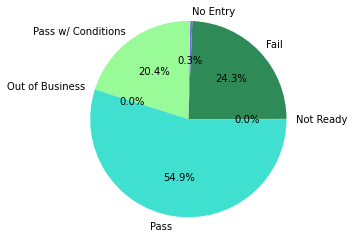

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = countResultsdf['results']
sizes = countResultsdf['cnt']
colors = ['turquoise', 'seagreen', 'mediumslateblue', 'palegreen', 'coral']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')

In [58]:
def labelForResults(s):
    if s == 'Fail':
        return 0.0
    elif s == 'Pass w/ Conditions' or s == 'Pass':
        return 1.0
    else:
        return -1.0
    
label = UserDefinedFunction(labelForResults, DoubleType())
labeledData = data.select(label(data.Results).alias('label'), data.Violations).where('label >= 0')

In [59]:
labeledData.take(1)

[Row(label=0.0, Violations="16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED - Comments: - OBSERVED A SLIGHT DEBRIS ACCUMULATION ON THE INTERIOR OF THE ICE MACHINES.   MUST REMOVE DEBRIS, DETAIL CLEAN MACHINES AND MAINTAIN.  -  | 37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER - Comments: - MUST PROVIDE IDENTIFYING LABELS ON ALL FOOD ARTICLES STORED OUT OF ORIGINAL CONTAINERS WITH THE COMMON NAME OF FOOD, IN ENGLISH; AND MAINTAIN AT ALL TIMES.  -  | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: - OBSERVED EVIDENCE OF PEST INFESTATION AT TIME OF INSPECTION. OBSERVED APPROX 500 RODENT DROPPINGS THROUGHOUT OUT ENTIRE FACILITY, TWO LIVE COCKROACHES IN THE KITCHEN, AND TWO DEAD MICE ONE UNDER THE FOOD STORAGE SHELVING AND ONE UNDER THE KITCHEN GRILL. AT THIS TIME.  DROPPINGS HAVE BEEN SIGHTED IN THE FOLLOWING AREAS: ON THE FLOOR, AT THE WALL BASES IN THE KITCHEN/HALLS/DINING AREA/FOOD STORAGE/FOOD PREP, THE WALLS, THE CABINETS, SHELVING, COUNTERS, ON FOOD CONTAINERS, INSIDE THE EQUIPM

In [64]:
labeledData.count()

158967

In [61]:
train, test = labeledData.randomSplit([0.8, 0.2], seed=22)

In [62]:
train.count()

127068

In [63]:
test.count()

31899

In [65]:
tokenizer = Tokenizer(inputCol="Violations", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10, regParam=0.01)
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

model = pipeline.fit(train)

In [66]:
predictionsDf = model.transform(test)
predictionsDf.registerTempTable('Predictions')
predictionsDf.columns

['label',
 'Violations',
 'words',
 'features',
 'rawPrediction',
 'probability',
 'prediction']

In [75]:
numSuccesses = predictionsDf.where("""(prediction = 0 AND label = 0) OR
                                        (prediction = 1 AND label = 1)""").count()
numInspections = predictionsDf.count()

print("There were", numInspections, "inspections and there were", numSuccesses, "successful predictions")
print("This is a", str((float(numSuccesses) / float(numInspections)) * 100) + "%", "success rate")

There were 31899 inspections and there were 29538 successful predictions
This is a 92.59851406000188% success rate


In [86]:
t_p = spark.sql("SELECT count(*) AS cnt FROM Predictions WHERE prediction = 0 AND label = 0").toPandas()

In [87]:
f_p = spark.sql("SELECT count(*) AS cnt FROM Predictions WHERE prediction = 0 AND label = 1").toPandas()

In [88]:
t_n = spark.sql("SELECT count(*) AS cnt FROM Predictions WHERE prediction = 1 AND label = 0").toPandas()

In [89]:
f_n = spark.sql("SELECT count(*) AS cnt FROM Predictions WHERE prediction = 1 AND label = 1").toPandas()

(-1.104958213489095,
 1.1002361054042427,
 -1.1175284894495177,
 1.1198452837265431)

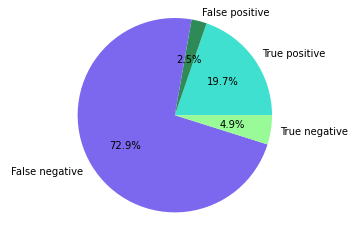

In [92]:
labels = ['True positive', 'False positive', 'False negative', 'True negative']
sizes = [t_p['cnt'][0], f_p['cnt'][0], f_n['cnt'][0], t_n['cnt'][0]]
colors = ['turquoise', 'seagreen', 'mediumslateblue', 'palegreen', 'coral']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')